## **MCP Server and Local LLM Implementation with Ollama & LangChain**
*In this thrust we have four tasks, which will be enhancing MCP using and learning how to use two brilliant tools for LLM application.*

Prework:  follow the instruction in slides.Implement the MCP in Local Environment.

### Part 1 Using MCP to built Agent-like work-flow.

**Task 1.1 MCP + Claude = Browser Automation**\
*use MCP + Claude to do browser automation tasks*
step 1: Learn all kinds of cool MCP server\
[Introducing to more MCP server](https://github.com/punkpeye/awesome-mcp-servers)

step 2: Install cline\
[cline](https://cline.bot/)

step 3: Open Claude, follow the instruction in the MCP Configuration file(mcp_example.json). Use rave Search、GitHub、Puppeteer、Filesystem、Sequential Thinking and Notion.

Now, follow the instructions below to complete a small task for each plugin.

1. 🔍 Use Brave Search to:
Task: Search for “latest AI paper publication platforms” and list the top 3 search results with titles and URLs.
Prompt in Claude:
"Use Brave Search to look up the latest AI paper publication platforms and return the top 3 results with title and link."

2. 💼 Use GitHub to:
Task: Access one of your public repositories (e.g., my-cool-project) and list the 5 most recent commits.
Prompt in Claude:
"Connect to my GitHub account using the MCP plugin and list the 5 latest commits from the repository my-cool-project."

3. 🤖 Use Puppeteer to:
Task: Visit https://www.inference.ai/, take a full-page screenshot, and save it as example.png.
Prompt in Claude:
"Use Puppeteer to go to https://www.inference.ai/ and capture a full-page screenshot saved as example.png."

4. 💾 Use Filesystem to:
Task: Create a new folder on your Desktop named mcp_test, and inside it, create a text file hello.txt containing “Hello MCP!”.
Prompt in Claude:
"Use Filesystem to create a folder named mcp_test on my Desktop and add a file hello.txt inside with the text 'Hello MCP!'."

5. 🧠 Use Sequential Thinking to:
Task: Think step-by-step about how to prepare for a technical interview and generate a preparation plan.
Prompt in Claude:
"Use Sequential Thinking to create a step-by-step plan for preparing for a technical interview."

6. 📝 Use Notion to:
Task: Create a new Notion page titled “MCP Automation Test” and log the results of all the tasks above.
Prompt in Claude:
"Use the Notion plugin to create a new page titled 'MCP Automation Test' and write a summary of the tasks I just completed using each plugin."


Advanced Task: Use Claude + Puppeteer to automatically visit a webpage, scrape table content, and save it locally (with the help of the Filesystem plugin).
Project Management Workflow: Record the scraped and analyzed data into a Notion database, automatically generating documentation.

### Part 2 Play with Ollama

<img src="https://ollama.com/public/blog/meta-ollama-llama3.png" alt="jupyter" width="500"/>

***Ollama** is a **convenient** and **free** framework，designed for easy deployment and running of large language models (LLMs) locally.*  




**Task 2.1: Install Ollama and run LLMs locally**  
- refer to [Ollama](https://ollama.ai/) to complete installation.  
- Run `ollama run llama2` from the command line to download and launch the `llama2` model.


**Task 2.2: Using Ollama to call OpenAI API**\
*Ollama now has built-in compatibility with the OpenAI Chat Completions API, making it possible to use more tooling and applications with Ollama locally.*

See official instruction below：\
[Ollama OpenAI Compatibility](https://ollama.com/blog/openai-compatibility)\
[Ollama OpenAI](https://github.com/ollama/ollama/blob/main/docs/openai.md)




Usage：

*To invoke Ollama’s OpenAI compatible API endpoint, use the same OpenAI format and change the hostname to http://localhost:11434:*

Curl Method:

OpenAI Python library

In [ ]:
from openai import OpenAI

client = OpenAI(
    base_url = 'http://localhost:11434/v1',
    api_key='ollama', # required, but unused
)

response = client.chat.completions.create(
  model="llama2",
  messages=[
    {"role": "system", "content": "You are a helpful assistant."},
    {"role": "user", "content": "Who won the world series in 2020?"},
    {"role": "assistant", "content": "The LA Dodgers won in 2020."},
    {"role": "user", "content": "Where was it played?"}
  ]
)
print(response.choices[0].message.content)

*In above examples, “Ollama” is essentially acting as a local server that is compatible with the OpenAI API. In other words, the endpoint you’re calling—whether via code or a cURL command—is not the official OpenAI endpoint at https://api.openai.com/v1/ but rather http://localhost:11434/v1/. The local process running on this port is Ollama.*

### Part 3 Combining LangChain with Ollama’s local LLMs

*LangChain simplifies every stage of the LLM application lifecycle.
It unifies functional modules such as "Prompt design", "Multi-round dialogue memory (Memory)", "External data retrieval (Retrieval)" and "Tools/Agents" into a unified package. In this way, you do not need to manually manage each step of the language model call and data flow, and only need to focus on business logic.*

LangChain–Ollama Documentation: [https://python.langchain.com/docs/integrations/llms/ollama](https://python.langchain.com/docs/integrations/llms/ollama)  




<img src="https://miro.medium.com/v2/resize:fit:4800/format:webp/1*-PlFCd_VBcALKReO3ZaOEg.png" alt="jupyter" width="700"/>


**Task 3.1 Reproduce practice in lecture using LCEL**

*A chain is a sequence of steps or model calls connected together to achieve a larger task. Each step can involve retrieving information, transforming text, or invoking a language model in some way, and then passing its output on to the next step in the chain. This structure helps you build more complex workflows or pipelines using multiple actions in a simple, organized manner.*

- what is LCEL? LCEL is a much simpler way to construct "Chain"\
[LCEL](https://python.langchain.com/docs/concepts/lcel/)\
why use it?\
[Why LCEL](https://python.langchain.com/v0.1/docs/expression_language/why/)

Example code with a Ollama local model：

In [ ]:
# Example: Using LCEL to reproduce a "Basic Prompting" scenario
from langchain_core.prompts import PromptTemplate
from langchain_core.output_parsers import StrOutputParser
from langchain_core.runnables import RunnablePassthrough
from langchain_community.chat_models import ChatOllama 

# 2. Define the prompt
prompt = PromptTemplate.from_template(
    "What is the capital of {topic}?"
)

# 3. Define the model
model = ChatOllama(model = ["llama2"])  # Using Ollama 

# 4. Chain the components together using LCEL
chain = (
    # LCEL syntax: use the pipe operator | to connect each step
    {"topic": RunnablePassthrough()}  # Accept user input
    | prompt                          # Transform it into a prompt message
    | model                           # Call the model
    | StrOutputParser()               # Parse the output as a string
)

# 5. Execute
result = chain.invoke("Germany")
print("User prompt: 'What is the capital of Germany?'")
print("Model answer:", result)


### **Submission Requirements**  
1. Complete all tasks.  
2. Include screenshots of key outputs (e.g., model responses, agent computation results).

- Advance Work：Integrate the Ollama and Langchain tasks into **Gradio Web UI**, which will be useful for building Proxy AI-Agent interface translation with front-end, and demonstrate your work.

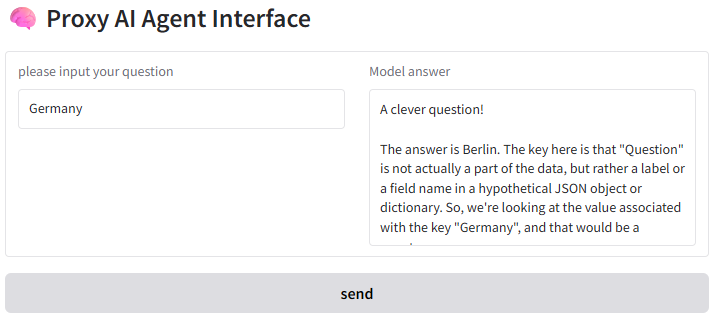
